isBestSeller                       FALSE  TRUE
category                                      
3D Printers                          244     1
3D Printing & Scanning              4047     2
Abrasive & Finishing Products        243     5
Agricultural Equipment & Supplies   8383   109
Alexa Built-In Devices               106     1
...                                  ...   ...
Wearable Technology                 1570    29
Wind Instruments                     239     7
Window Treatments                    231     5
Women's Sports & Outdoor Shoes      1938    20
eBook Readers & Accessories           24     0

[141 rows x 2 columns]
------
Index(['FALSE', 'TRUE'], dtype='object', name='isBestSeller')
isBestSeller                    FALSE  TRUE  isBestSeller_percentage
category                                                            
Light Bulbs                        18     5                21.739130
Lighting                           14     2                12.500000
Mobile Phone Accesso

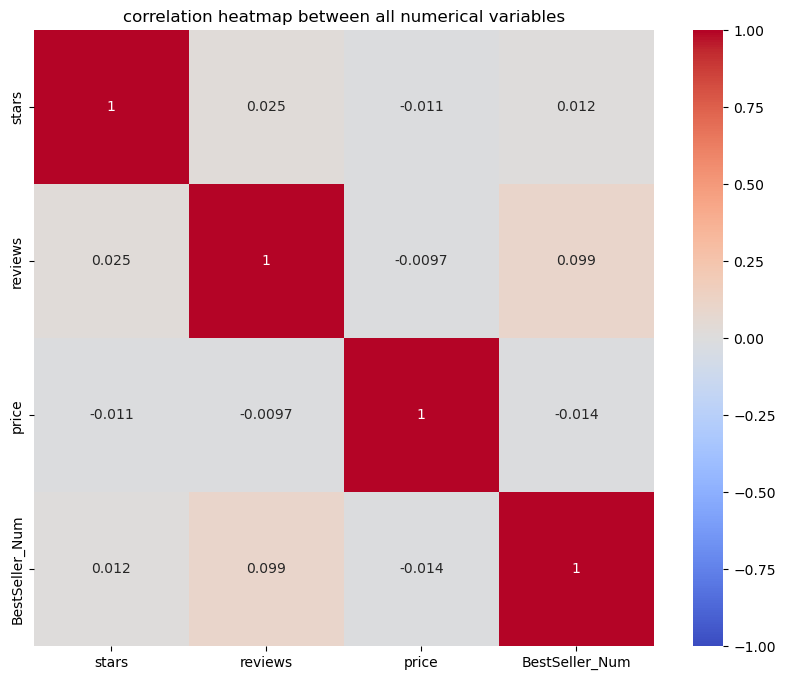

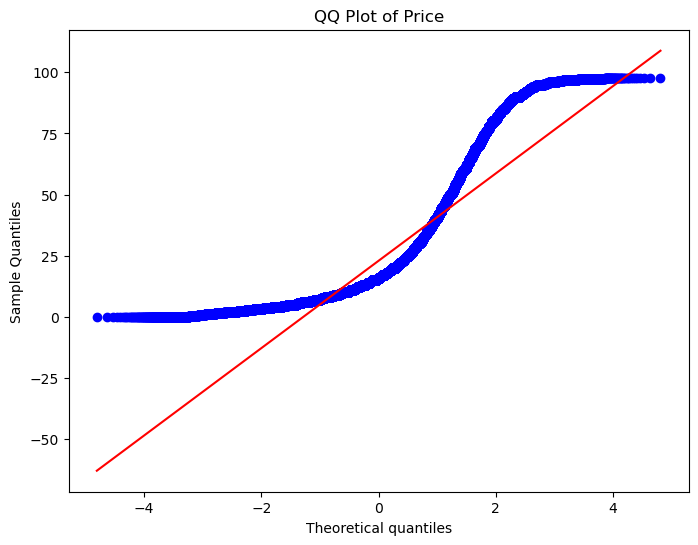

In [114]:
## Part 1

import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## 1
df = pd.read_csv("C:\\Users\\dell\\Desktop\\amz_uk_price_prediction_dataset.csv", encoding='latin-1')
df.dropna(subset=['category'],inplace = True)

crosstab = pd.crosstab(df['category'],df['isBestSeller'])
print(crosstab)
print(f"------")
print(crosstab.columns)

crosstab['isBestSeller_percentage'] = crosstab['TRUE']/(crosstab['TRUE']+crosstab['FALSE'])*100
crosstab = crosstab.sort_values(by='isBestSeller_percentage',ascending = False)
print(crosstab)
## yes we found category "Light Bulbs" and "Lighting" have highest percentage( 21.74%/12.5%) and are most prevalent compare with all other categories

### 2

# contingency_table = pd.crosstab(crosstab.index,crosstab['isBestSeller_percentage'])

# chi2 , p, dof, expected = chi2_contingency(contingency_table)
# print(f"Chi-square test statistic: {chi2}")
# print(f" P-value:{p}")

# n= contingency_table.sum().sum()
# cramers_v = np.sqrt(chi2/(n*(min(contingency_table.shape)-1)))
# print(f"cramers_v value is {cramers_v}")
## why here get contradictory result which P-value:0.259   VS  cramers_v value is 1.00

### 3

# crosstab = pd.crosstab(df['category'],df['isBestSeller'])
# crosstab.plot (kind='bar',stacked = True,figsize=(10,6))
# plt.title('Relationship between product categories and the best-seller status')
# plt.xlabel('Product category')
# plt.ylabel('Number of products')
# plt.legend(title='Is Best Seller')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

### Part 2

## 0
df['price'] = pd.to_numeric(df['price'],errors ='coerce').fillna(0)
Q1= df['price'].quantile(0.25)
Q3= df['price'].quantile(0.75)
IQR = Q3-Q1
df = df[(df['price'] >= Q1 -1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

## 1

# top20_category = df['category'].value_counts().nlargest(20).index
# df_top20 = df[df['category'].isin(top20_category)]

# plt.figure(figsize=(12,8))
# sns.violinplot(x='category',y='price', data=df_top20, inner='quartile')
# plt.xticks(rotation=90)
# plt.title('Price distribution for top 20 categories products')
# plt.xlabel('Category')
# plt.ylabel('Price')
# plt.show()

# median_price_top20 = df_top20.groupby('category')['price'].median()
# top1_median_category = median_price_top20.idxmax()
# print(f"highest median price category is: {top1_median_category}")

## 2
# avg_price_top10_category = df.groupby('category')['price'].mean().nlargest(10)
# plt.figure(figsize=(10,6))
# avg_price_top10_category.plot(kind='bar')
# plt.title('Average price of products for the top 10 product categories')
# plt.xlabel('Category')
# plt.ylabel('Average Price')
# plt.xticks(rotation=45,ha='right')
# plt.show()
# ## from bar chart here we can easily find Motherboards category commands the highest average price

## 3
# top10_category = df['category'].value_counts().nlargest(10).index
# df_top10_rating = df[df['category'].isin(top10_category)]

# plt.figure(figsize=(12,8))
# sns.boxplot(x='category',y='stars',data =df_top10_rating)
# plt.xticks(rotation=90)
# plt.title('Product ratings distribution across top 10 categories')
# plt.xlabel('Category')
# plt.ylabel('Rating')
# plt.show()

# median_rating_top10 = df_top10_rating.groupby('category')['stars'].median()
# top1_median_category_rating = median_rating_top10.idxmax()
# print(f"highest median rating category is: {top1_median_category_rating}")


### Part 3

# ## 1
# df= df[df['stars'] != 8977.0]
# correlation =df['price'].corr(df['stars'])
# print(f"correlation coefficient between price and stars is:{correlation}")
# # since correlation coefficient between price and stars is:-0.048, so i assume correlation between product price and its rating is very low

# ## 2-1
# plt.figure(figsize=(8,6))
# sns.scatterplot(x='stars',y='price',data=df)
# plt.title('scatter plot the relationship between product rating and price.')
# plt.xlabel('Rating(Stars)')
# plt.ylabel('Price')
# plt.show()
# #  I didn't find any patterns between product rating and price

## 2-2

df['BestSeller_Num'] = df['isBestSeller'].map({'TRUE':1,'FALSE':0})
heatmap_columns = df[['stars','reviews','price', 'BestSeller_Num']]

corr_matrix =heatmap_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('correlation heatmap between all numerical variables')
plt.show()

plt.figure(figsize=(8,6))
stats.probplot(df['price'],dist='norm',plot=plt)
plt.title(('QQ Plot of Price'))
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#print(df.dtypes)
# print(df['isBestSeller'].value_counts())
# numeric_df=df.select_dtypes(include=['number'])
# df =df.apply(lambda col: pd.to_numeric(col,errors='coerce').fillna(0) if col.dtype !='object' else col)
